In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Locate Data Files
images = "data/images"
data_entry ="data/Data_Entry_2017_v2020.csv"

# Change the size of data that will be included in the plot
data_range = 1000

In [3]:
my_dict = {'Image_Index': [],
           'Labels':[],
           'Finding_Labels': [],
           'Follow_Up': [],
           'Patient_ID': [],
           'AGE': [],
           'SEX': [],
           'View_Position': [],
           'View': [],
           'Orig_Width': [],
           'Orig_Height': [],
           'Pixel_X': [],
           'Pixel_Y': []}

df = pd.read_csv(data_entry)[0:data_range]


for i in range(len(df)):
    my_dict['Image_Index'].append(df['Image Index'].values[i])
    my_dict['Labels'].append(df['Finding Labels'].values[i])
    my_dict['Finding_Labels'].append(df['Finding Labels'].values[i])
    my_dict['Follow_Up'].append(df['Follow-up #'].values[i])
    my_dict['Patient_ID'].append(df['Patient ID'].values[i])
    my_dict['AGE'].append(df['Patient Age'].values[i])
    my_dict['SEX'].append(df['Patient Gender'].values[i])
    my_dict['View'].append(df['View Position'].values[i])
    my_dict['View_Position'].append(df['View Position'].values[i])
    my_dict['Orig_Width'].append(df['OriginalImage[Width'].values[i])
    my_dict['Orig_Height'].append(df['Height]'].values[i])
    my_dict['Pixel_X'].append(df['OriginalImagePixelSpacing[x'].values[i])
    my_dict['Pixel_Y'].append(df['y]'].values[i])


In [4]:
df = pd.DataFrame.from_dict(my_dict)
df.dtypes
df.head()

,Image_Index,Labels,Finding_Labels,Follow_Up,Patient_ID,AGE,SEX,View_Position,View,Orig_Width,Orig_Height,Pixel_X,Pixel_Y
0,00000001_000.png,Cardiomegaly,Cardiomegaly,0,1,57,M,PA,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,Cardiomegaly|Emphysema,1,1,58,M,PA,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,Cardiomegaly|Effusion,2,1,58,M,PA,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,No Finding,0,2,80,M,PA,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,Hernia,0,3,74,F,PA,PA,2500,2048,0.168,0.168


In [5]:
# Convert categorical columns to int
df['Finding_Labels'] = df['Finding_Labels'].astype('category')
df['SEX'] = df['SEX'].astype('category')
df['View_Position'] = df['View_Position'].astype('category')


cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [6]:
df.describe()

,Finding_Labels,Follow_Up,Patient_ID,AGE,SEX,View_Position,Orig_Width,Orig_Height,Pixel_X,Pixel_Y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,78.759000,9.159000,121.628000,61.781000,0.485000,0.632000,2610.381000,2464.537000,0.156861,0.156861
std,34.512752,13.666254,72.418949,12.165897,0.500025,0.482503,325.123677,394.263638,0.015074,0.015074
min,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,1725.000000,1831.000000,0.139000,0.139000
25%,61.000000,1.000000,54.000000,54.000000,0.000000,0.000000,2500.000000,2048.000000,0.143000,0.143000
50%,100.500000,3.000000,118.000000,60.000000,0.000000,1.000000,2500.000000,2500.000000,0.168000,0.168000
75%,105.000000,10.250000,181.000000,71.000000,1.000000,1.000000,2992.000000,2974.000000,0.168000,0.168000
max,111.000000,65.000000,246.000000,94.000000,1.000000,1.000000,3056.000000,3056.000000,0.194311,0.194311


In [7]:
df.head()

,Image_Index,Labels,Finding_Labels,Follow_Up,Patient_ID,AGE,SEX,View_Position,View,Orig_Width,Orig_Height,Pixel_X,Pixel_Y
0,00000001_000.png,Cardiomegaly,23,0,1,57,1,1,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,38,1,1,58,1,1,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,32,2,1,58,1,1,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,105,0,2,80,1,1,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,90,0,3,74,0,1,PA,2500,2048,0.168,0.168


<AxesSubplot:>

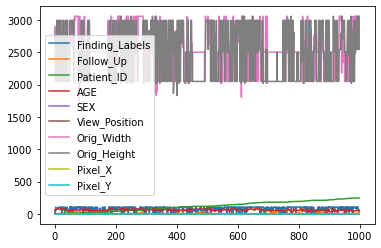

In [8]:
df.plot() #kind='hist'

In [9]:
import glob
import matplotlib.image as mpimg
from skimage.transform import resize

In [11]:
img_fns = glob.glob(images + "/*.png")

range = img_fns[0:data_range]
all_imgs = []

for i in range:
    image = mpimg.imread(i)
    # Convert into greyscale by taking the mean of the channels
    if image.shape == (1024,1024,4):
        image =np.mean(image, axis=2)

    image = resize(image, (256,256))


    all_imgs.append(image)

(256, 256)


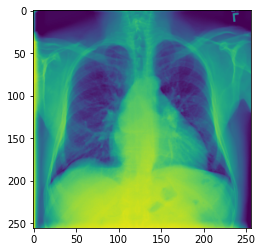

In [12]:
all_imgs = np.array(all_imgs)
print(all_imgs[0].shape)
plt.imshow(all_imgs[0])

In [13]:
all_imgs_flat = all_imgs.reshape((len(all_imgs), 256*256))

In [14]:
from sklearn.manifold import TSNE
import os

In [15]:
model = TSNE(n_components=2, init='pca') #, method='exact')
X_embedded = model.fit_transform(all_imgs_flat)

print(X_embedded.shape)

(1000, 2)


In [16]:
X_embedded

array([[-8.9923725, 22.988495 ],
       [-9.832444 , 32.758457 ],
       [34.576378 , 10.703703 ],
       ...,
       [12.338059 , -1.5225407],
       [10.874575 ,  4.952868 ],
       [11.113016 ,  5.8718185]], dtype=float32)

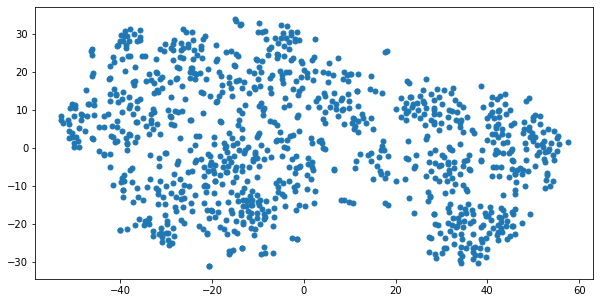

In [17]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(X_embedded[:,0], X_embedded[:,1], s=25)

In [18]:
df.columns

Index(['Image_Index', 'Labels', 'Finding_Labels', 'Follow_Up', 'Patient_ID',
       'AGE', 'SEX', 'View_Position', 'View', 'Orig_Width', 'Orig_Height',
       'Pixel_X', 'Pixel_Y'],
      dtype='object')

In [25]:
print(len(df))
df['x_val'] = pd.Series([data_range])
df['x_val'] = X_embedded[:,0]
df['y_val'] = X_embedded[:,1]
df['filepaths'] = img_fns[0:data_range]

base_filepaths = [os.path.basename(fn) for fn in img_fns[0:data_range]]
df['base_filepaths'] = base_filepaths

1000


In [26]:
print(df['filepaths'][0])
print(df['base_filepaths'][0])

df['filepaths'][0]

data/images\00000001_000.png
00000001_000.png


'data/images\\00000001_000.png'

In [27]:
import struct #for coloring
# map colors
def clamp(x):
    return max(0, min(x, 255))

def set_colors(vals_for_color):
    min_val = min(vals_for_color); max_val = max(vals_for_color)
    vals_for_color_norm = [(float(val) - min_val) / (max_val - min_val) for val in vals_for_color] #between 0 and 1
    vals_for_color_norm = [val if val<1 else 0.9999 for val in vals_for_color_norm]

    colors_unit = [plt.cm.seismic(val)[:3] for val in vals_for_color_norm]
    colors_rgb = [(int(color[0]*255), int(color[1]*255), int(color[2]*255)) for color in colors_unit]

    colors_hex = ["#{0:02x}{1:02x}{2:02x}".format(clamp(color_rgb[0]), clamp(color_rgb[1]), clamp(color_rgb[2])) for color_rgb in colors_rgb]
    
    return colors_hex

# 'Finding_Labels', 'Follow_Up', 'Patient_ID', 'AGE', 'SEX'
# 'View_Position', 'Orig_Width', 'Orig_Height', 'Pixel_X', 'Pixel_Y'
for col in ['Finding_Labels', 'Follow_Up', 'Patient_ID', 'AGE', 'SEX','View_Position', 'Orig_Width', 'Orig_Height', 'Pixel_X', 'Pixel_Y']:
    print('color_'+col)
    my_col_string = 'color_'+col
    df[my_col_string] = set_colors(df[col].values)

df['color_data'] = set_colors(df.Finding_Labels)

color_Finding_Labels
color_Follow_Up
color_Patient_ID
color_AGE
color_SEX
color_View_Position
color_Orig_Width
color_Orig_Height
color_Pixel_X
color_Pixel_Y


In [28]:
df.columns

Index(['Image_Index', 'Labels', 'Finding_Labels', 'Follow_Up', 'Patient_ID',
       'AGE', 'SEX', 'View_Position', 'View', 'Orig_Width', 'Orig_Height',
       'Pixel_X', 'Pixel_Y', 'x_val', 'y_val', 'filepaths', 'base_filepaths',
       'color_Finding_Labels', 'color_Follow_Up', 'color_Patient_ID',
       'color_AGE', 'color_SEX', 'color_View_Position', 'color_Orig_Width',
       'color_Orig_Height', 'color_Pixel_X', 'color_Pixel_Y', 'color_data'],
      dtype='object')

In [30]:
# Create bokeh plot
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import CustomJS, HoverTool, PanTool, WheelZoomTool
from bokeh.models.widgets import Button
from bokeh.layouts import column, row

output_file("./bokeh_vis_CXR14.html")
figure_size=500

# Change colour here:
df['color_data'] = set_colors(df.View_Position)

source = ColumnDataSource(data=df.to_dict('list'))
source2 = ColumnDataSource(data=df.to_dict('list'))

# 'Finding_Labels', 'Follow_Up', 'Patient_ID', 'AGE', 'SEX' , 
# 'View_Position', 'Orig_Width', 'Orig_Height', 'Pixel_X', 'Pixel_Y
hover = HoverTool(
    tooltips="""
        <div>
            <span style="font-size: 14px;">@Image_Index</span>
            <br>
            <span style="font-size: 10px;">Finding_Labels: @Labels</span>
            <br>
            <span style="font-size: 10px;">M/F: @SEX</span>
            <br>
            <span style="font-size: 10px; color=blue">AGE: @AGE</span>
            <br>
            <span style="font-size: 10px;">Follow_Up: @Follow_Up</span>
            <br>
            <span style="font-size: 10px;">Patient_ID: @Patient_ID</span>
            <br>
            <span style="font-size: 10px;">View_Position: @View_Position</span>
            <br>
            <span style="font-size: 10px;">Orig_Width: @Orig_Width</span>
            <br>
            <span style="font-size: 10px;">Orig_Height: @Orig_Height</span>
            <br>
            <span style="font-size: 10px;">Pixel_X: @Pixel_X</span>
            <br>
            <span style="font-size: 10px;">Pixel_Y: @Pixel_Y</span>
        </div>
        <div>
            <img
                src="@filepaths" alt="@base_filepaths" height="208" width="176"
                style="float: center;"
                border="2"
            ></img>
        </div>
        """
)

#set up the plot  
p = figure(tools=[hover, PanTool(), WheelZoomTool()], #WheelZoomTool()
            plot_width=figure_size+500, plot_height=figure_size,
            toolbar_location="above", title="CXR14 Visualisation")

#draw the scatter plot
p.circle('x_val', 'y_val', fill_color='color_data', source=source, line_color='black', size=10, alpha=0.7)

from bokeh.models import LinearAxis
p.xaxis.visible = None
p.yaxis.visible = None
xaxis = LinearAxis(axis_label= "X-embedding")
yaxis = LinearAxis(axis_label= "Y-embedding")
p.add_layout(xaxis, 'below')
p.add_layout(yaxis, 'left')
p.background_fill_color = "#dddddd"

callback = CustomJS(args=dict(source=source, source2=source2, xaxis=xaxis, yaxis=yaxis), code="""
    var data = source.data;
    var data2 = source2.data;
    data['color_data'] = data2[cb_obj.origin.name];
    source.change.emit();
""")

toggle1 = Button(label="Finding_Labels",name="color_Finding_Labels")
toggle2 = Button(label="Follow_Up",  name="color_Follow_Up")
toggle3 = Button(label="Patient_ID",  name="color_Patient_ID")
toggle4 = Button(label="AGE", name="color_AGE")
toggle5 = Button(label="SEX", name="color_SEX")
toggle6 = Button(label="View_Position",name="color_View_Position")
toggle7 = Button(label="Orig_Width",  name="color_Orig_Width")
toggle8 = Button(label="Orig_Height",  name="color_Orig_Width")
toggle9 = Button(label="Pixel_X", name="color_Pixel_X")
toggle10 = Button(label="Pixel_Y", name="color_Pixel_Y")

toggle1.js_on_click(callback) 
toggle2.js_on_click(callback) 
toggle3.js_on_click(callback) 
toggle4.js_on_click(callback) 
toggle5.js_on_click(callback) 
toggle6.js_on_click(callback) 
toggle7.js_on_click(callback) 
toggle8.js_on_click(callback) 
toggle9.js_on_click(callback) 
toggle10.js_on_click(callback) 

#output
layout = column(p, row(toggle1, toggle2, toggle3, toggle4),row(toggle5, toggle6,toggle7,toggle8),row(toggle9,toggle10))
show(layout)
# show(p)